<a href="https://colab.research.google.com/github/ranjan0601/EDA_Project/blob/main/EDA_on_Electoral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this Notebook, I will be providing you complete Analysis of Indian Election held in 2019.
The 2019 Indian general election was held in seven phases from 11 April to 19 May 2019 to
constitute the 17th Lok Sabha. The votes were counted and the result declared on 23 May.
About 911 million people were eligible to vote, and voter turnout was over 67 % the highest
ever, as well as the highest ever participation by women voters.
The Bharatiya Janata Party won 303 seats, further increasing its substantial majority and the
BJP-led National Democratic Alliance (NDA) won 353 seats.The BJP won 37.36% of votes,
while the NDA's combined vote was 45% of the 60.37 crore votes that were polled.
The Indian National Congress won just 52 seats, and the Congress-led United Progressive
Alliance won 91. Other parties and their alliances won 98 seats.

In [ ]:
path = "/content/drive/MyDrive/Amit_Document/LS_2.0.csv"

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objects as go
# import plotly.offline as py
# import plotly.express as px
# import pycountry
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
data = data.rename(columns = {"CRIMINAL\nCASES" : "Criminal", "GENERAL\nVOTES" : "Genral_votes", "POSTAL\nVOTES": "Postal_votes", "TOTAL\nVOTES": "Total_votes",
                       "OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY", "OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"})

In [ ]:
data.head(2)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,Criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,Genral_votes,Postal_votes,Total_votes,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790


In [ ]:
round(data.isnull().sum()/len(data.index),2)  # percentage of missing value in dataframe

In [ ]:
data.info()

In [ ]:
len(data.index), data.shape

(2263, (2263, 19))

In [ ]:
data = data.dropna()  ##delete null column form the dataset

In [ ]:
## Har state me kitne constituency hai??

num_cons = data.groupby("STATE")["CONSTITUENCY"].nunique().sort_values(ascending = False).reset_index()

num_cons.rename(columns = {"CONSTITUENCY": "No_of_uniq_const"})  ##UP has highest constituency

In [ ]:
data.Criminal.unique()

array(['52', '0', '3', '5', '1', '6', '2', '4', '9', '7', '40', '8', '24',
       '14', '28', 'Not Available', '12', '11', '13', '15', '204', '10',
       '22', '31', '42', '16', '240', '41', '18'], dtype=object)

In [ ]:
data.Criminal.replace("Not Available", '0', inplace = True)

In [ ]:
data['Criminal'] = data.Criminal.astype(int)

In [ ]:
data.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available', 'Post Graduate\n'],
      dtype=object)

In [ ]:
data.EDUCATION.replace({"Post Graduate\n":"Post Graduate", "Not Available": "Others"}, inplace = True )

In [ ]:
data.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass'], dtype=object)

In [ ]:
##chekcing value_count based on education

education  = data.EDUCATION.value_counts().reset_index()  #503 are post grad followed by graduate candidate

In [ ]:
education.rename(columns = {"index": "Education", "EDUCATION" : "Count"}, inplace = True)

In [ ]:
# ax = px.bar(data, x, y, color, title)
ax = px.bar(education, x = "Education" , y = "Count", color = 'Education', title = "Education level of candidate")
ax.show()

In [ ]:
data.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'Criminal', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS', 'LIABILITIES',
       'Genral_votes', 'Postal_votes', 'Total_votes',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [ ]:
Winner = data[data['WINNER'] == 1]

In [ ]:
# ax = px.bar(data, x, y, color, title).update_xaxes(categoryorder = "total descending")

ax = px.bar(Winner, x = 'EDUCATION', y = 'WINNER',color = 'EDUCATION', title = 'Winning candidate education degree').update_xaxes(categoryorder = "total descending")
ax.show()

In [ ]:
## Highest numbe of winning candiate are post graduate.

In [ ]:
young_winner = data[data['WINNER'] == 1].sort_values("AGE", ascending = True).head(20)

In [ ]:
young_winner

In [ ]:
# ax = px.bar(data, x, y, color, hover_data, title)

ax = px.bar(young_winner, x = 'NAME', y = 'AGE', color = 'AGE', hover_data = ['PARTY', 'STATE', 'CONSTITUENCY'], title = 'Young Winners')
ax.show()

In [ ]:
# OLD Winner

Old_winner = data[data['WINNER'] == 1].sort_values("AGE", ascending = False).head(20)

In [ ]:
# ax = px.bar(data, x, y, color, hover_data, title)
ax = px.bar(Old_winner, x = 'NAME', y = 'AGE', color = 'AGE', hover_data = ['PARTY', 'STATE', 'CONSTITUENCY'], title = 'Old Winners')
ax.show()

<Axes: xlabel='AGE'>

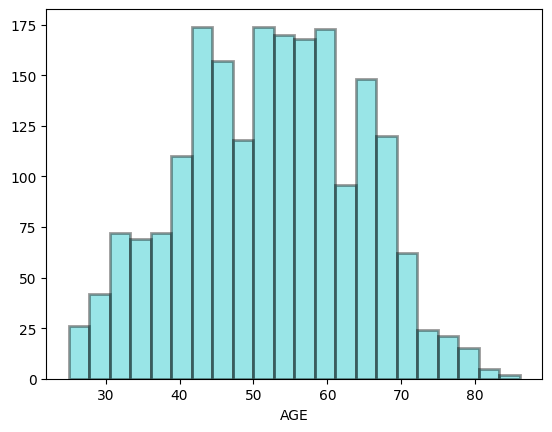

In [ ]:
## Making distribution plot on age.

# sns.distplot(column/series, kde= False, hist_kws=dict(edgecolor="black", linewidth=2), color)

sns.distplot(data['AGE'],
             kde = False,
             hist_kws=dict(edgecolor="black", linewidth=2),
             color = '#00BFC4')

In [ ]:
# No of Criminal Cases party wise.

criminal_cases = data.groupby('PARTY')['Criminal'].sum().reset_index().sort_values('Criminal', ascending= False).head(20)

In [ ]:
criminal_cases.rename(columns = {'PARTY': 'Party', 'Criminal': 'Case#'}, inplace = True)

In [ ]:
criminal_cases.head(2)

,Party,Case#
26,BJP,898
46,INC,734


In [ ]:
# ax = px.bar(data,x, y, color, hover_data, title)

ax = px.bar(criminal_cases, x = 'Party', y = 'Case#', color = 'Party', title = 'Total Criminal Cases by respective parties')
ax.show()

In [ ]:
## Changing the datatype

data['GENDER'] = data['GENDER'].astype('category')
data['WINNER'] = data['WINNER'].astype('category')

In [ ]:
data.GENDER.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
## Femal Winner

Femal_Winner = data[(data['WINNER'] ==1) & (data['GENDER'] == 'FEMALE')]
Male_Winner = data[(data['WINNER'] == 1) & (data['GENDER'] == 'MALE')]

In [ ]:
# ax = px.bar(data, x, y, color, hover_data, title).update_xaxes(categoryorder = "total descending")

ax = px.bar(Femal_Winner, x = 'STATE', title = 'Femal Winner from different states').update_xaxes(categoryorder = "total descending")
ax.show()

In [ ]:
data.head(1)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,Criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,Genral_votes,Postal_votes,Total_votes,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790


In [ ]:
# Statewise total votes

total_votes = data.groupby('STATE')['Total_votes'].sum().sort_values(ascending = False).reset_index()

In [ ]:
# ax = px.bar(data, x, y, color, hover_data, title).update_xaxes("total descending")

ax = px.bar(total_votes, x = 'STATE', y = 'Total_votes', color = 'STATE', title = "Total votes cast state wise")
ax.show()

In [ ]:
data.CATEGORY.unique()

array(['ST', 'SC', 'GENERAL'], dtype=object)

In [ ]:
# Category wise candidate count

candidate_catagory = data.CATEGORY.value_counts().reset_index()

In [ ]:
candidate_catagory.rename(columns = {'index': 'Category', 'CATEGORY': 'Count'}, inplace = True)

In [ ]:
# ax = px.bar(data, x, y, color, hover_data, title).update_xaxes(categoryorder = "total descending")

ax = px.bar(candidate_catagory, x = 'Category',y = 'Count', color = 'Category', hover_data= "Count", title = "Catagory wise candidates")
ax.show()